In [ ]:
# importing libraries
import numpy as np #used for performing numerical computations
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for creating static, animated, and interactive visualization
import seaborn as sns #for creating attractive and informative statistical graphics
from sklearn.preprocessing import StandardScaler #is a preprocessing technique used to standardize features

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
#import dataset
heart_df = pd.read_csv('/content/data.csv')       
heart_df.head(10)
# Age:"Age of the patient"
# gender
# cp:"Chest Pain Type"
# trestbps:"Resting Blood Pressure (mm Hg)"
# chol:"Serum Cholesterol (mg/dL)" 
# fbs:"Fasting Blood Sugar > 120 mg/dL"
# restecg:"Resting Electrocardiographic Results"
# thalach:"Maximum Heart Rate Achieved"
# exang:"Exercise Induced Angina"
# oldpeak:"ST Depression Induced by Exercise"
# slope:"Slope of Peak Exercise ST Segment"
# ca:"Number of Major Vessels Colored by Flouroscopy"
# thal:"Thalassemia"

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [ ]:
# information about the dataset
heart_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [ ]:
#description about dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
heart_df.shape

(270, 14)

# Checking null values

In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_df.notnull().sum()

age         270
sex         270
cp          270
trestbps    270
chol        270
fbs         270
restecg     270
thalach     270
exang       270
oldpeak     270
slope       270
ca          270
thal        270
target      270
dtype: int64

In [ ]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Exploratory Data Analysis(EDA)
It is a process of examining and exploring a dataset to understand its main characteristics and patterns. It involves summarizing the data, visualizing it through graphs and charts, and analyzing the relationships between variables.

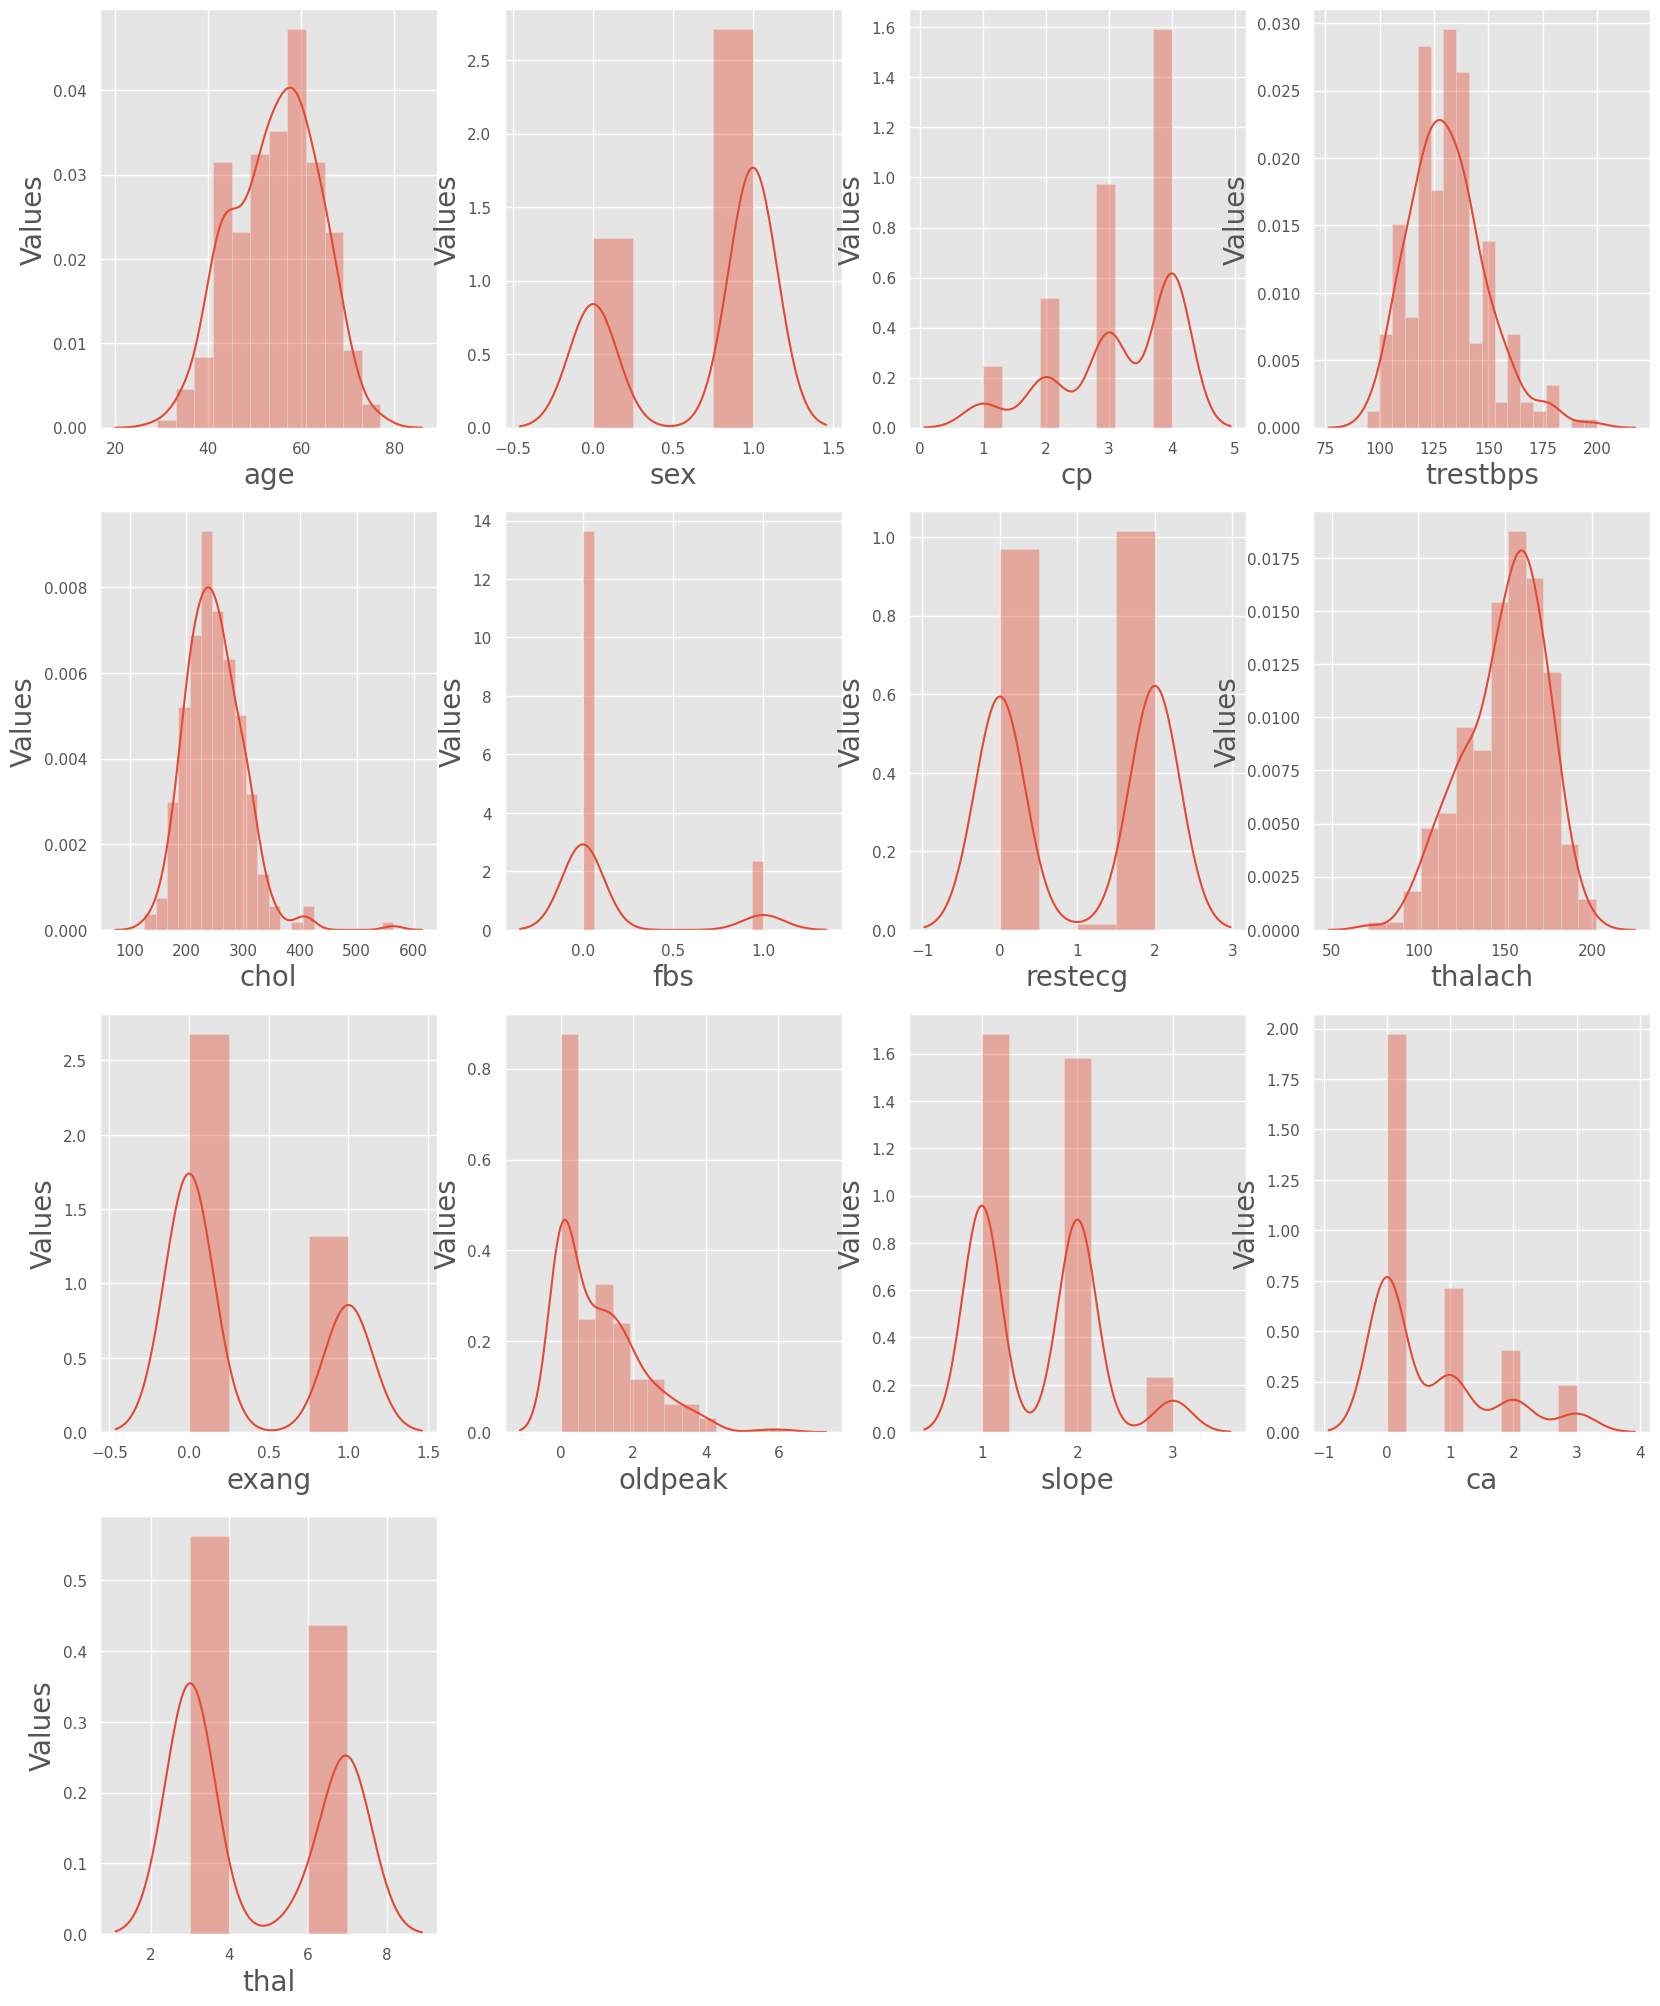

In [ ]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25)) # creating an empty figure with size 20x25 and plots number 1 on that figure.
plotnumber=1

for column in heart_df: # iterating through each column in heart_df and creates a subplot of 4x4 (four columns) with plotnumber=1.
    if plotnumber<14: # number of columns in dataset
        ax=plt.subplot(4,4,plotnumber) # creates an empty figure with four subplots and labels them 1-4.
        sns.distplot(heart_df[column]) # sns is called to create a distplot using heart_df[column].
        plt.xlabel(column,fontsize=20) # labeling each column with its name and fontsize 20pts 
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
#CHECKING THE VARIANCE
#variance refers to the spread or variability of data points in a dataset. It measures how much the individual values differ from the mean or average value.
# variance is the variability in the model prediction—how much the ML function can adjust depending on the given data set
heart_df.var()

age           82.975093
sex            0.219207
cp             0.902671
trestbps     319.037051
chol        2671.467107
fbs            0.126669
restecg        0.995787
thalach      536.650434
exang          0.221795
oldpeak        1.311506
slope          0.377475
ca             0.890940
thal           3.766157
target         0.247831
dtype: float64

We can see ,there is a huge variance.So,we should normalise it.

# Normalization
The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information


In [ ]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])#checking variance again

trestbps    0.017561
chol        0.039953
thalach     0.027642
dtype: float64

In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    float64
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 27.5 KB


# Logistic Regression
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

In [ ]:
accuracies={} #initializes an empty dictionary where we store accuracies of diff algos

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2') #creating instance of logistic reg model with L2 regularization: used to prevent overfitting
lr.fit(x_train,y_train) #fits the logistic regression model to the training data. 

y_pred = lr.predict(x_test) #predictiong on test data

acc=accuracy_score(y_test,y_pred)#calculates the accuracy score by comparing the predicted labels y_pred with the true labels y_test
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 87.3015873015873 %
Testing accuracy score of the model is: 81.48148148148148 %


In [ ]:
print("Confusion matrix of the model\n",confusion_matrix(y_test,y_pred))

print("Classification Report\n",classification_report(y_test,y_pred))

Confusion matrix of the model
 [[39  9]
 [ 6 27]]
Classification Report
               precision    recall  f1-score   support

           1       0.87      0.81      0.84        48
           2       0.75      0.82      0.78        33

    accuracy                           0.81        81
   macro avg       0.81      0.82      0.81        81
weighted avg       0.82      0.81      0.82        81



# KNearestNeighbors
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)#creating an instance that will consider the 8 nearest neighbors to a data point.

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 82.01058201058201 %
Testing accuracy score of the model is: 80.24691358024691 %


In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[39  9]
 [ 7 26]]
Classification Report               precision    recall  f1-score   support

           1       0.85      0.81      0.83        48
           2       0.74      0.79      0.76        33

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81



# SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 71.42857142857143 %
Testing accuracy score of the model is: 61.72839506172839 %


In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[27 21]
 [10 23]]
Classification Report               precision    recall  f1-score   support

           1       0.73      0.56      0.64        48
           2       0.52      0.70      0.60        33

    accuracy                           0.62        81
   macro avg       0.63      0.63      0.62        81
weighted avg       0.65      0.62      0.62        81



# Decision Tree
used to categorize or make predictions based on how a previous set of questions were answered.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 77.77777777777779 %


In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[36 12]
 [ 6 27]]
Classification Report               precision    recall  f1-score   support

           1       0.86      0.75      0.80        48
           2       0.69      0.82      0.75        33

    accuracy                           0.78        81
   macro avg       0.77      0.78      0.78        81
weighted avg       0.79      0.78      0.78        81



# Random Forest
Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
#The classifier will use the Gini impurity as the criterion for splitting, limit the depth of each decision tree 
#to 7 levels, consider a subset of features at each split, require at least 2 
#samples at each leaf node, require at least 4 samples to perform a split, and consist of 180 decision trees.
rfc.fit(x_train, y_train)

y_pred4 = rfc.predict(x_test)

acc4=accuracy_score(y_test,y_pred4)
accuracies['RF']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 96.82539682539682 %
Testing accuracy score of the model is: 81.48148148148148 %


In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Confusion matrix of the model [[39  9]
 [ 6 27]]
Classification Report               precision    recall  f1-score   support

           1       0.87      0.81      0.84        48
           2       0.75      0.82      0.78        33

    accuracy                           0.81        81
   macro avg       0.81      0.82      0.81        81
weighted avg       0.82      0.81      0.82        81



# Naive bayes
P(A|B)=P(B|A)P(A)/P(B)
it predicts on the basis of the probability of an object.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred5 = nb.predict(x_test)

acc5 = accuracy_score(y_test,y_pred5)
accuracies['Naive Bayes']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(y_train, nb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 87.3015873015873 %
Testing accuracy score of the model is: 80.24691358024691 %


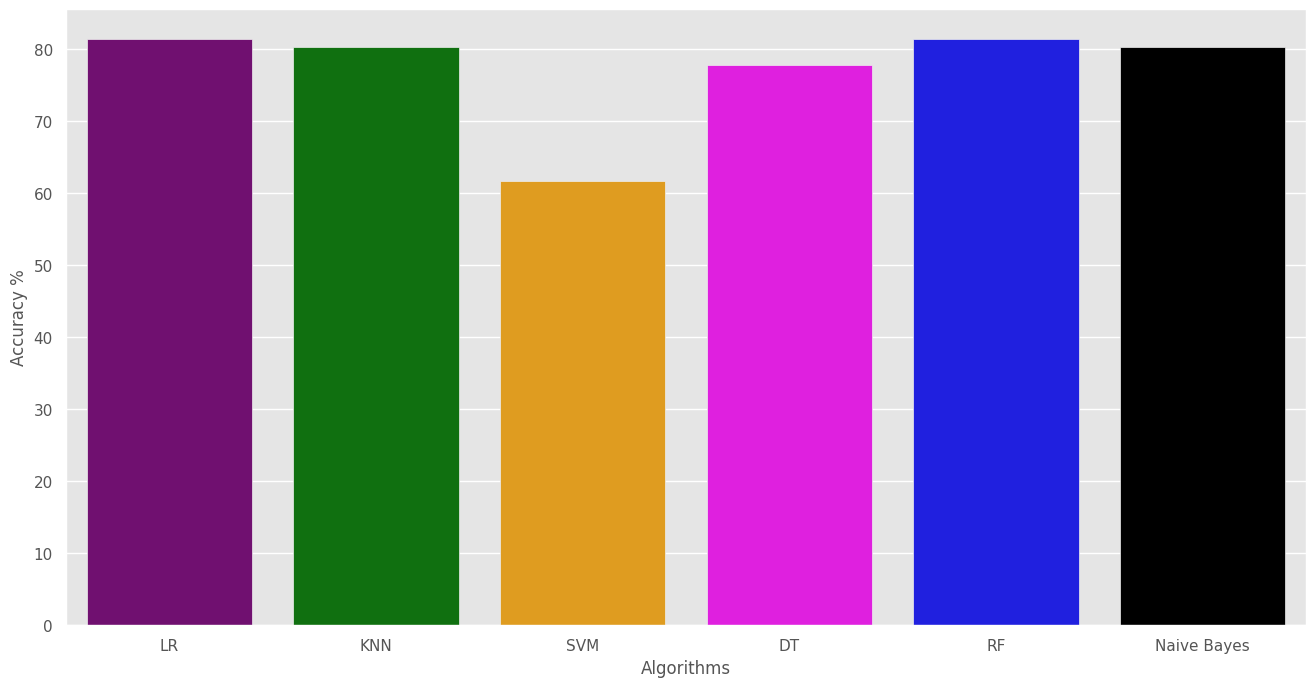

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Score': [acc, acc1, acc2, acc3, acc4, acc5 ]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.814815
4,Random Forest,0.814815
1,KNN,0.802469
5,Naive Bayes,0.802469
3,Decision Tree,0.777778
2,SVM,0.617284
